Taller tomado e inspirado en EC1 del curso DS4A

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha visto aumentar el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019). 

La ciudad te ha contratado para construir visualizaciones que les ayuden a identificar patrones en los accidentes, lo que les ayudaría a tomar acciones preventivas para reducir el número de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. Que les importa y de los que les gustaría obtener información específica.

**Tu tarea es formatear los datos dados y proporcionar visualizaciones que respondan a las preguntas específicas del cliente, que se mencionan a continuación.

**Contexto analítico: Se le da un archivo CSV (almacenado en la carpeta "datos" ya creada) que contiene detalles sobre cada accidente, como la fecha, la hora, la ubicación del accidente, el motivo del accidente, los tipos de vehículos implicados, el número de heridos y muertos, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Usted realizará las siguientes tareas con los datos:

1. Extraer los datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar los datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Usted tendrá que proporcionar visualizaciones para acompañarlas.

Tenemos las siguientes columnas:

1. **BOROUGH**: The borough in which the accident occurred
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the location of the accident
5. **DATE**: Date of the accident
6. **TIME**: Time of the accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Injuries by category
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Deaths by category
11. **ON STREET NAME**: Street where the accident occurred
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: Zip code of the accident location

## Ejercicios

In [1]:
# Importe aqui las librerias necesarias (numpy,pandas,seaborn,etc)
import json
import numpy as np
import pandas as pd
import seaborn as sns

1. Utilice (adapte) la función json.load() para cargar el archivo borough_data.json como un diccionario.

In [2]:
#Pista
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

2. Del mismo modo, utilice la función de pandas read_csv() para cargar el archivo accidents.csv como un DataFrame. Nombre este DataFrame df. Nota: Recuerde que ek separador es ';' en lugar de ','

In [3]:
df = pd.read_csv('data/accidents.csv', sep = ';') 
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


### Respondiendo las preguntas del cliente

1. Agrupe los datos de accidentes por mes.

In [4]:
#Pista. que hacen estas funciones? 
df["MES"]=pd.to_datetime(df["DATE"]).dt.to_period("M")
df_mes=df.groupby("MES").size()

2. Genere un diagrama de linea cuyo eje 'x' sea la fecha y el 'y' numero de accidentes. 

<AxesSubplot:xlabel='MES'>

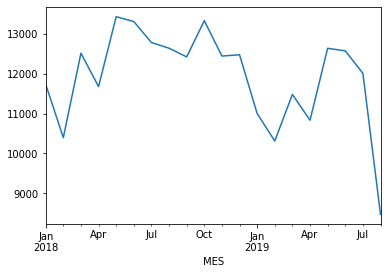

In [5]:
df_mes.plot.line()

3. Responda: Segun el diagrama anterior, incrementaron los accidentes durante el ultimo año y medio?

R/

### Los datos se comportaron de forma volatil, no tienen un comportamiento establecido se deberia verificar mas a fondo la variacion porcentual de cada mes

4. Según el gráfico anterior, ¿qué meses parecen tener el menor número de accidentes? ¿A qué crees que se debe esto?

R/

### Notamos que los meses con menor numero de accidentes son los meses de febrero de ambos, pero no se puede deducir el por qué a partir del grafico

5. Cree una nueva columna HORA basada en los datos de la columna TIME.
Sugerencia: Puede encontrar útil la funcion dt.hour.

In [6]:
df['HORA'] = pd.to_datetime(df['TIME']).dt.hour

6. Genere un grafico de barras cuyo eje 'x' sea la hora y eje 'y' el numero de accidentes 

<AxesSubplot:xlabel='HORA', ylabel='DATE'>

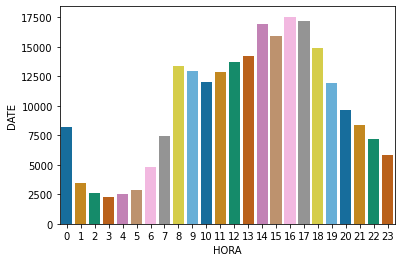

In [7]:
dfHoras = df.groupby(['HORA']).count()
dfHoras.reset_index(inplace =True)
sns.barplot(x = 'HORA', y = 'DATE', data = dfHoras, palette = 'colorblind')

7. ¿Cómo varía el número de accidentes a lo largo de un mismo día?

R/

 ### Las horas de mayor índice de accidentalidad son las horas pico  (7 am, 4-5 pm) que pueden reflejar un resultado de comportamiento de los conductores con mayor presión y estrés. En las horas de la noche se aprecia que el índice de accidentalidad es mayor a la medianoche y vale la pena revisar la correlación con otros factores que se han medido.


8. En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar de ocurrencia. ¿Qué crítica le haría a este enfoque?

R/

### Se debería discriminar el análisis por día de la semana pues el comportamiento del tráfico varía mucho en días hábiles y en fin de semana. Adicionalmente, el análisis de los lugares de ocurrencia porque pueden influir factores como la señalización, el estado de las vías, el tipo de actividades en los barrios (residencial, comercial, etc.). En ese sentido, es muy importante ampliar el enfoque de análisis.


9. Calcule el número de accidentes por día de la semana.
Sugerencia: Puede encontrar útil dt.weekday.

In [8]:
semana = dict({0:'lunes',
               1:'martes',
               2:'miercoles',
               3:'jueves',
               4:'viernes',
               5:'sabado',
               6:'domingo'
              })

df['DIA'] = pd.to_datetime(df["DATE"]).dt.weekday
accDia = df.groupby(['DIA'])['COLLISION_ID'].count().reset_index(name = 'cantidad')
accDia['DIA'] = accDia['DIA'].map(semana)
accDia

,DIA,cantidad
0,lunes,34719
1,martes,35651
2,miercoles,35188
3,jueves,36254
4,viernes,37886
5,sabado,31784
6,domingo,27040


10. Cree un gráfico de barras basado en el recuento de accidentes por día de la semana.

<AxesSubplot:xlabel='DIA', ylabel='cantidad'>

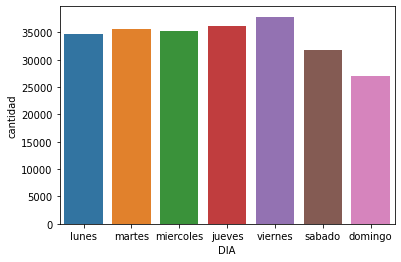

In [9]:
sns.barplot(x = 'DIA', y = 'cantidad', data = accDia)

11. ¿Cómo varía el número de accidentes a lo largo de una misma semana?

### Se puede decir que el numero de accidentes es consistente a lo largo de la semana mostrando un pequeño decremento el fin de semana posiblemente porque la gente no labora y hay menos automoviles en las calles

12. Calcule el número total de accidentes de cada borough

In [10]:
municipios = df.groupby(['BOROUGH'])['COLLISION_ID'].count().reset_index(name = 'Cantidad')
municipios

,BOROUGH,Cantidad
0,BRONX,37709
1,BROOKLYN,76253
2,MANHATTAN,48749
3,QUEENS,67120
4,STATEN ISLAND,8691


13. Cree un gráfico con lo anterior

<AxesSubplot:xlabel='BOROUGH', ylabel='Cantidad'>

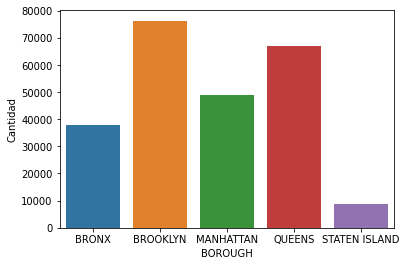

In [11]:
sns.barplot(x = 'BOROUGH',y = 'Cantidad', data = municipios)

14. Qué notas en este gráfico?

R/

### Las localidades de Brooklyn y queens son las que presentan mayor cantidad de accidentes, cabe resaltar que estas localidades son las mas grandes de NY 

15. (dificil) ¿Y por milla cuadrada? Calcule el número de accidentes por milla cuadrada para cada municipio.
Pista: Tendrás que actualizar las claves del diccionario de municipios para que coincidan con los nombres del DataFrame.

In [12]:
for nombre, info in borough_data.items():
    if "the " in nombre:
        aux = borough_data[nombre] ### en auxiliar guardo toda la información "el valor de la clave"
        nombreAux = nombre ## aqui guardo el nombre para poderlo borrar
        del borough_data[nombre] ### borro todo ese registro 
        borough_data[nombreAux.replace("the ","")] = aux #cambio el nombre de la clave para que coincida y al mismo tiempo le asigno el valor 

borough_data

{'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37},
 'bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1}}

In [13]:
indices = municipios.BOROUGH
municipios['accidentes_x_m2'] = np.NaN
for i in range(len(indices)):
    municipios['accidentes_x_m2'][i] = municipios['Cantidad'][i]/ borough_data[indices[i].lower()]['area']

municipios.head()

C:\Users\Mateo\AppData\Local\Temp/ipykernel_30116/2364662809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipios['accidentes_x_m2'][i] = municipios['Cantidad'][i]/ borough_data[indices[i].lower()]['area']


,BOROUGH,Cantidad,accidentes_x_m2
0,BRONX,37709,895.700713
1,BROOKLYN,76253,1076.715617
2,MANHATTAN,48749,2135.304424
3,QUEENS,67120,618.446512
4,STATEN ISLAND,8691,148.894980


16. Traza un gráfico de barras de los accidentes por milla cuadrada por municipio con los datos que acabas de calcular.

<AxesSubplot:xlabel='BOROUGH', ylabel='accidentes_x_m2'>

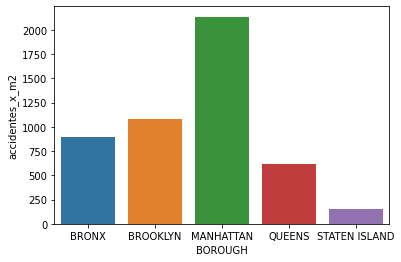

In [14]:
sns.barplot(x = "BOROUGH", y = 'accidentes_x_m2', data = municipios)

17. Que puedes concluir de este grafico?

R/

### Hay mas accidentes en manhattan por su gran afluencia de trafico dado que es el centro de la ciudad

18. Trace un gráfico de barras para cada borough que muestre el número de accidentes para cada hora del día. Sugerencia: Puede utilizar sns.FacetGrid para crear una cuadrícula de gráficos con los datos horarios de cada borough.

<AxesSubplot:xlabel='HORA', ylabel='cantidad'>

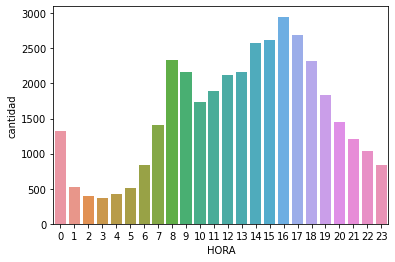

In [15]:
mun_hora = df.groupby(['BOROUGH','HORA'])['COLLISION_ID'].count().reset_index(name = 'cantidad')
sns.barplot(data = mun_hora[mun_hora['BOROUGH'] == 'BRONX'], x = 'HORA', y = 'cantidad')

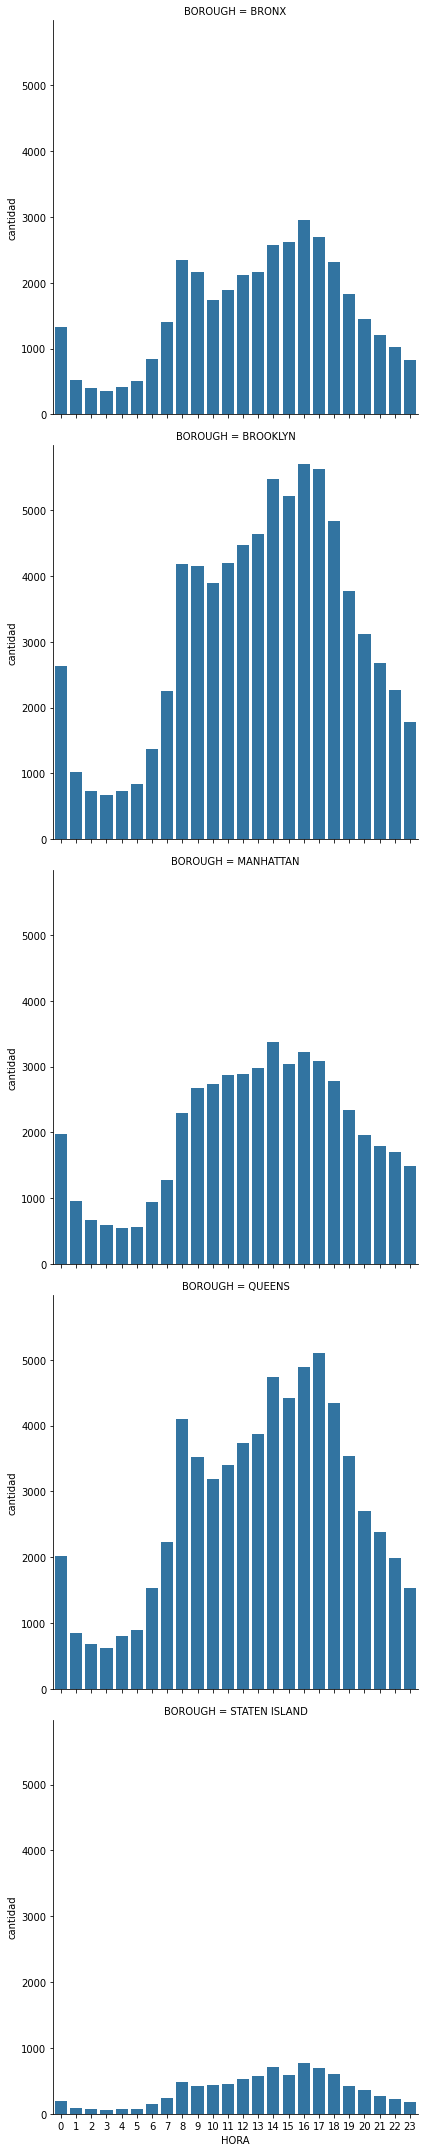

In [16]:
#for indice in indices:
 #   print(indice)
  #  sns.barplot(data = mun_hora[mun_hora['BOROUGH'] == indice], x = 'HORA', y = 'cantidad')

g = sns.FacetGrid(mun_hora, row = 'BOROUGH', height = 6)
g.map_dataframe(sns.barplot, y = 'cantidad', x = 'HORA')

19. ¿Cuáles son las horas en las que se producen más accidentes en cada borough?

<AxesSubplot:xlabel='HORA'>

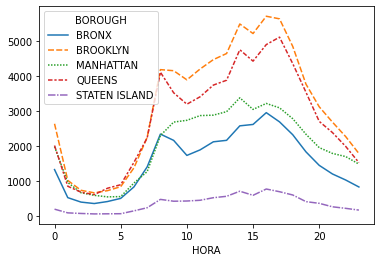

In [17]:
df_wide = mun_hora.pivot('HORA','BOROUGH','cantidad')
sns.lineplot(data = df_wide)

# Plus

In [18]:
!pip install folium

In [19]:
import folium

In [20]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MES,HORA,DIA
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,2018-09,12,2
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,2018-09,16,1
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,2019-08,19,3
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-09,13,6
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,2019-08,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01,15,5
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,2018-01,14,3
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2018-01,13,5
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01,17,0


In [21]:
coorNY = [40.7, -73.98]
folium_hmap = folium.Map(location = coorNY, zoom_start = 13, tiles = "OpenStreetMap")
df_limpio = df.dropna()

In [22]:
compri = zip(df_limpio['LATITUDE'], df_limpio['LONGITUDE'])
listaCompri = list(compri)
listaCompri[0:12]

[(40.637657, -73.89686999999999),
 (40.80556, -73.914505),
 (40.8651, -73.92189),
 (40.70544, -73.94799),
 (40.810352, -73.91761),
 (40.625256, -73.9987),
 (40.706356, -73.900276),
 (40.691875, -73.80400999999999),
 (40.588867, -73.801994),
 (40.669796000000005, -73.87057),
 (40.666695, -73.767136),
 (40.68718, -73.79914000000001)]

In [23]:
from folium.plugins import HeatMap
capa1 = HeatMap(listaCompri, min_opacity=0.3, radius= 6, blur = 4)
folium_hmap.add_child(capa1)
folium_hmap

# ubicacion de accidentes fatales

In [24]:
df_limpio['heridos'] = df_limpio['NUMBER OF PEDESTRIANS INJURED'] + df_limpio['NUMBER OF CYCLIST INJURED'] + df_limpio['NUMBER OF MOTORIST INJURED']
df_limpio['muertos'] = df_limpio['NUMBER OF PEDESTRIANS KILLED'] + df_limpio['NUMBER OF CYCLIST KILLED'] + df_limpio['NUMBER OF MOTORIST KILLED']
df_limpio.head()

C:\Users\Mateo\AppData\Local\Temp/ipykernel_30116/2998167764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['heridos'] = df_limpio['NUMBER OF PEDESTRIANS INJURED'] + df_limpio['NUMBER OF CYCLIST INJURED'] + df_limpio['NUMBER OF MOTORIST INJURED']
C:\Users\Mateo\AppData\Local\Temp/ipykernel_30116/2998167764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['muertos'] = df_limpio['NUMBER OF PEDESTRIANS KILLED'] + df_limpio['NUMBER OF CYCLIST KILLED'] + df_limpio['NUMBER OF MOTORIST 

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MES,HORA,DIA,heridos,muertos
1385,08/16/2019,20:45,BROOKLYN,11236.0,40.637657,-73.896870,EAST 95 STREET,0,0,0,...,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,2019-08,20,4,1,0
1455,08/17/2019,8:00,BRONX,10454.0,40.805560,-73.914505,EAST 138 STREET,0,0,0,...,Sedan,Station Wagon/Sport Utility Vehicle,Taxi,Sedan,Station Wagon/Sport Utility Vehicle,2019-08,8,5,2,0
1759,08/04/2019,18:00,MANHATTAN,10034.0,40.865100,-73.921890,WEST 204 STREET,0,0,0,...,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,2019-08,18,6,0,0
2185,08/21/2019,20:10,BROOKLYN,11206.0,40.705440,-73.947990,LORIMER STREET,0,0,0,...,Sedan,Sedan,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,2019-08,20,2,1,0
2927,08/06/2019,23:15,BRONX,10454.0,40.810352,-73.917610,EAST 142 STREET,0,0,1,...,Sedan,Bike,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,2019-08,23,1,1,0


In [36]:
lat_log_mortales = df_limpio.loc[df_limpio['muertos'] > 0, ['LATITUDE','LONGITUDE']]
lat_log_heridos = df_limpio.loc[df_limpio['muertos'] == 0, ['LATITUDE','LONGITUDE']]
lat_log_ilesos = df_limpio.loc[(df_limpio['muertos'] == 0) & (df_limpio['heridos'] == 0), ['LATITUDE','LONGITUDE']]

In [37]:
folium_map = folium.Map(location = [40.6643, -73.9385],
                       zoom_start = 13,
                       tiles = "OpenStreetMap")

for i in range(len(lat_log_mortales)):
    marcador = folium.CircleMarker(location = [lat_log_mortales['LATITUDE'].iloc[i], lat_log_mortales['LONGITUDE'].iloc[i]], radius = 8, color = 'red',fill = True)
    marcador.add_to(folium_map)

for i in range(len(lat_log_heridos)):
    marcador = folium.CircleMarker(location = [lat_log_heridos['LATITUDE'].iloc[i], lat_log_heridos['LONGITUDE'].iloc[i]], radius = 6, color = 'blue',fill = True)
    marcador.add_to(folium_map)

for i in range(len(lat_log_ilesos)):
    marcador = folium.CircleMarker(location = [lat_log_ilesos['LATITUDE'].iloc[i], lat_log_ilesos['LONGITUDE'].iloc[i]], radius = 4, color = 'yellow',fill = True)
    marcador.add_to(folium_map)

folium_map



In [33]:
peatones = df_limpio.loc[df_limpio['NUMBER OF PEDESTRIANS INJURED'] > 0, ['LATITUDE','LONGITUDE']]
ciclistas = df_limpio.loc[df_limpio['NUMBER OF CYCLIST INJURED'] > 0, ['LATITUDE','LONGITUDE']]
motoristas = df_limpio.loc[df_limpio['NUMBER OF MOTORIST INJURED'] > 0, ['LATITUDE','LONGITUDE']]
folium_map = folium.Map(location = [40.6643, -73.9385],
                       zoom_start = 13,
                       tiles = "OpenStreetMap")

for i in range(len(peatones)):
    marcador = folium.CircleMarker(location = [peatones['LATITUDE'].iloc[i], peatones['LONGITUDE'].iloc[i]], radius = 8, color = 'orange',fill = True)
    marcador.add_to(folium_map)
    
for i in range(len(ciclistas)):
    marcador = folium.CircleMarker(location = [ciclistas['LATITUDE'].iloc[i], ciclistas['LONGITUDE'].iloc[i]], radius = 6, color = 'black',fill = True)
    marcador.add_to(folium_map)

for i in range(len(motoristas)):
    marcador = folium.CircleMarker(location = [motoristas['LATITUDE'].iloc[i], motoristas['LONGITUDE'].iloc[i]], radius = 4, color = 'purple',fill = True)
    marcador.add_to(folium_map)

folium_map